In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from collections import Counter

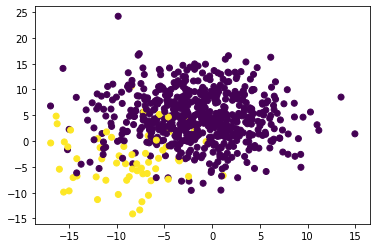

In [2]:
# Generate imbalanced dataset
X, y = make_blobs(n_samples = [600,60], random_state=1, cluster_std=5)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
# Normal train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [4]:
Counter(y_train)

Counter({0: 451, 1: 44})

In [5]:
# SMOTE oversampling
from imblearn.over_sampling import SMOTE
from collections import Counter

X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 451, 1: 451})

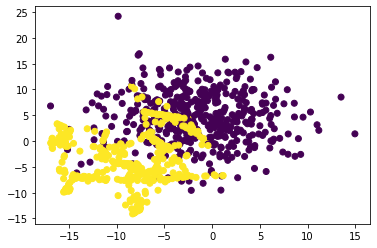

In [6]:
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled)

In [7]:
#SMOTEENN combination sampling
from imblearn.combine import SMOTEENN

sm = SMOTEENN(random_state=1)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 330, 1: 361})

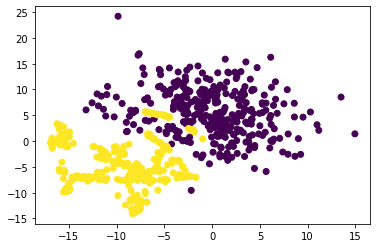

In [8]:
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled)

In [9]:
# Logistic regression using random combination sampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [10]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[126,  23],
       [  1,  15]])

In [11]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.85      0.94      0.91      0.89      0.79       149
          1       0.39      0.94      0.85      0.56      0.89      0.80        16

avg / total       0.93      0.85      0.93      0.88      0.89      0.79       165

